In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
import sympy as sy
from scipy.optimize import curve_fit
import sys
import random
import time
start = time.time()
import os
from scipy.optimize import fsolve
from scipy import constants as const 

#plot 3d contour plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ITER parameters
kappa = 1.7 #kappa
triangularity = 0.33 #sigma
T = 13 #KeV CHANGE TO YOUR LIKING
P_fus = 500 # MW NNED TO CHANGE UNITS 
# convert pfus from MW to eVs
#P_fus = P_fus*1000/e
Q = 10
M = 2.554 # effective mass
gamma_rad = 0.7
q_95 = 3
A = 3.1 # aspect ratio

# Constants from scaling laws
C_sl = 0.0562
alpha_M =0.19
alpha_kappa = 0.78
alpha_epsilon = 0.58
alpha_N = 0.41
alpha_I = 0.93
alpha_R = 1.97
alpha_B = 0.15
alpha_P = -0.69

# Constants
E_DT =  17.6 * 1000 # keV
Lambda = 4.94 # defined in 2.3 of DOI 10.1088/1741-4326/ab48a5

A =  3 # major radius / minor radius
Z_eff = 1 # assuming no impurities, no He
m_e = const.m_e # electron mass
c = const.c # speed of light
e = const.e # electron charge
epsilon_0 = const.epsilon_0 # vacuum permittivity
k = 1.380649e-23 #Boltzmann Constant
mu_0 = const.mu_0 # vacuum permeability
pi = np.pi

kappa_plus = kappa/(1+triangularity)
kappa_minus = kappa/(1-triangularity)
C_beta = 4*10**2*mu_0*10**(19)*10**(3)*e
C_n = 10/pi
m_D = 3.343583e-27 #Deuterium mass Kg
m_T = 5.023388e-27 #Tritum mass Kg

In [3]:
# recode from paper
P_fus = 500 #MW
def p_Fusion(beta_N,R,B):
    return  C_fus*C_I**2/C_beta**2*kappa/(A**4*q_95**2)*beta_N**2*R**3*B**4 - P_fus

# constants from paper
C_fus = 1.45*10**(-3) 
C_tr = 0.087
C_n = 3.183
C_I = 13.144
C_beta = 0.741
gammaI = 1 + alpha_N + alpha_I
gammaEpsilon = 1 + alpha_epsilon + 2*alpha_I
gammaR = alpha_R + alpha_I - alpha_N
gammaB = alpha_B + alpha_N + alpha_I + 2

def qFunction(beta_N,R,B,n_N):

    return (Q/(gamma_rad*(1+Q/Lambda)))**(1+alpha_P) - C_sl*C_n**alpha_N*C_I**gammaI*C_fus/(C_beta*C_tr)*P_fus**alpha_P*M**alpha_M*kappa**alpha_kappa*(1/A)**gammaEpsilon*q_95**(-gammaI)*n_N**alpha_N*beta_N*R**gammaR*B**gammaB

In [4]:
n_N = 0.85
C_2_L = P_fus/((C_fus*C_I**2)/(C_beta**2) * kappa/(A**4*q_95**2))
C_1_L = ((Q/(gamma_rad*(1+Q/Lambda)))**(1+alpha_P)) / ((C_sl*C_n**alpha_N*C_I**gammaI*C_fus/(C_beta*C_tr)*P_fus**alpha_P*M**alpha_M*kappa**alpha_kappa*(1/A)**gammaEpsilon*q_95**(-gammaI)*n_N**alpha_N))
print(C_1_L)
print(C_2_L)

47330.40240803097
469961.11352209497


In [10]:
C_I

13.144

In [6]:
# define a starting value for beta_N and n_N
beta_N = 1.7 #iter value
n_N = 0.85 # iter calue

def func(x):
    B = x[0]
    R = x[1]
    return [p_Fusion(beta_N,R,B), qFunction(beta_N,R,B,n_N)]

root = fsolve(func, [6, 5])
# plot the progress of the fsolve 
# print the conversion of the solution to the correct units
print('B = ', root[0], 'T')
print('R = ', root[1], 'm')

# define database with columns for beta_N, n_N, B, R
df = pd.DataFrame(columns=['beta_N','n_N','B','R'])
# plot the iterations of fsolve

beta_N_range = np.linspace(1.5,2.1,100) #iter value, upper limir 2.8
n_N_range = np.linspace(0.75, 0.95, 100) # iter calue, upper limit? 
result =[]
for j in range(len(n_N_range)):
    for i in range(len(beta_N_range)):
        
        beta_N = beta_N_range[i]
        n_N = n_N_range[j]
        root = fsolve(func, [10, 10], maxfev = 10000)
        #result.append(root)
        B = root[0]
        R = root[1]
        col = ['beta_N','n_N','B','R']
        # use concat to add a row to the dataframe
        df = pd.concat([df, pd.DataFrame([[beta_N, n_N, B, R]], columns=col)], ignore_index=True)
        
        




B =  5.040812197238875 T
R =  6.3152033171427435 m


C:\Users\jasmi\AppData\Local\Temp\ipykernel_8108\1605319241.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return (Q/(gamma_rad*(1+Q/Lambda)))**(1+alpha_P) - C_sl*C_n**alpha_N*C_I**gammaI*C_fus/(C_beta*C_tr)*P_fus**alpha_P*M**alpha_M*kappa**alpha_kappa*(1/A)**gammaEpsilon*q_95**(-gammaI)*n_N**alpha_N*beta_N*R**gammaR*B**gammaB
C:\Users\jasmi\AppData\Local\Temp\ipykernel_8108\1605319241.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return (Q/(gamma_rad*(1+Q/Lambda)))**(1+alpha_P) - C_sl*C_n**alpha_N*C_I**gammaI*C_fus/(C_beta*C_tr)*P_fus**alpha_P*M**alpha_M*kappa**alpha_kappa*(1/A)**gammaEpsilon*q_95**(-gammaI)*n_N**alpha_N*beta_N*R**gammaR*B**gammaB
C:\Users\jasmi\AppData\Local\Temp\ipykernel_8108\1605319241.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return (Q/(gamma_rad*(1+Q/Lambda)))**(1+alpha_P) - C_sl*C_n**alpha_N*C_I**gammaI*C_fus/(C_beta*C_tr)*P_fus**alpha_P*M**alpha_M*kappa**alpha_kappa*(1/A)**gammaEpsilon*q_9

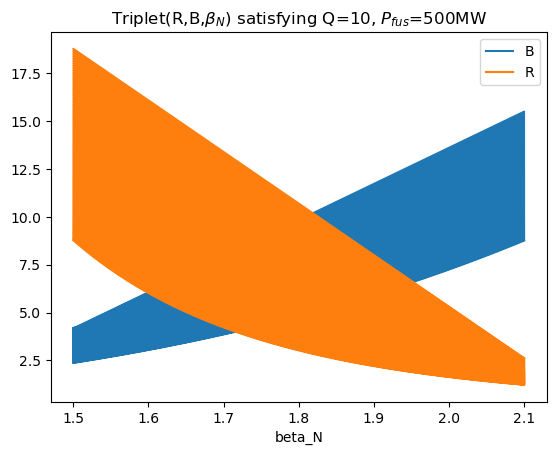

In [7]:
# plot B vs beta_N
plt.plot(df['beta_N'],df['B'])
plt.plot(df['beta_N'],df['R'])
plt.xlabel('beta_N')
plt.title('Triplet(R,B,$\u03B2_N$) satisfying Q=10, $P_{fus}$=500MW')
plt.legend(['B','R'])

# draw y line to cross at B = 5.3 T






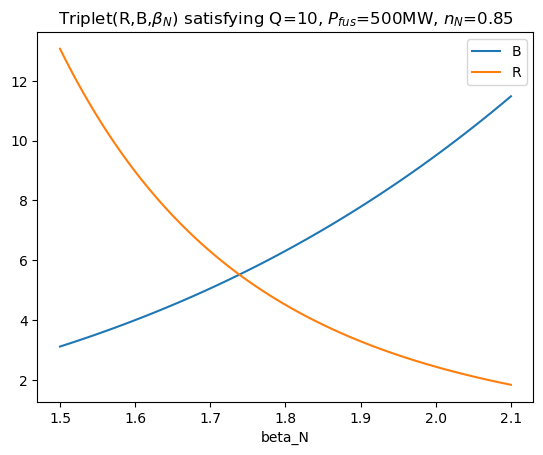

In [8]:
# plot R and B vs beta_N between 0.83 and 0.85
df_85 = df[(df['n_N'] > 0.848) & (df['n_N'] < 0.85)]

plt.plot(df_85['beta_N'],df_85['B'])
plt.plot(df_85['beta_N'],df_85['R'])
plt.xlabel('beta_N')
plt.title('Triplet(R,B,$\u03B2_N$) satisfying Q=10, $P_{fus}$=500MW, $n_N$=0.85')
plt.legend(['B','R'])



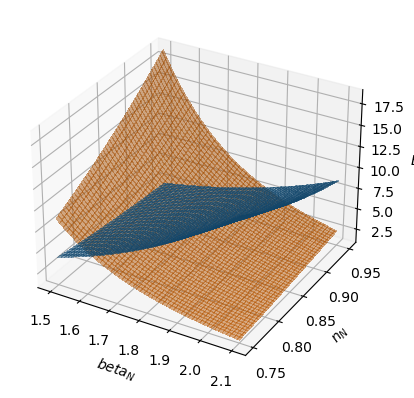

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = beta_N_range
Y = n_N_range
X, Y = np.meshgrid(X, Y)
Z = df['B'].values.reshape(len(beta_N_range),len(n_N_range))
surf = ax.plot_surface(X, Y, Z, 
                          linewidth=0, antialiased=False, label='B', alpha =0.5)
Z = df['R'].values.reshape(len(beta_N_range),len(n_N_range))
surf = ax.plot_surface(X, Y, Z, 
                          linewidth=0, antialiased=False, label='R', alpha =0.5)


ax.set_xlabel('$beta_N$')
ax.set_ylabel('$n_N$')
ax.set_zlabel('$B$')

#view from the side

plt.show()